# Clarity Air Monitors

1. Locations of Clarity air monitors in SSF and San Bruno
2. PM2.5 and NO2 metrics for Clarity air monitors during 2024-2025

Imports:

In [3]:
import requests
import folium
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import networkx as nx

### Locations of Clarity Air Monitors

In [64]:
# Read data
clarity_df = pd.read_csv("../data/risesouthcity_clarity_24hmean_cleaned.csv")

clarity_df.head()

,Datasource.ID,Date,PM2.5.Mean.Mass.Concentration,NO2.Mean.Concentration,Temperature.Internal,Temperature.Ambient,Rel.Humidity.Internal,Rel.Humidity.Ambient,Wind.Speed,Wind.Direction,Atmospheric.Pressure,Latitude,Longitude,Location
0,DVRGV9737,2025-01-01,20.41,7.43,10.37,NaN,71.95,NaN,NaN,NaN,NaN,37.66409,-122.40165,Gardiner Park
1,DEVPF7186,2025-01-01,24.12,11.91,10.06,NaN,74.12,NaN,NaN,NaN,NaN,37.65721,-122.41898,Evelin Pacheco Home
2,DUBTA4581,2025-01-01,15.27,NaN,9.40,NaN,78.23,NaN,NaN,NaN,NaN,37.62428,-122.45347,Portola Elementary
3,DJTYV8538,2025-01-01,8.93,NaN,10.33,NaN,74.13,NaN,NaN,NaN,NaN,37.61580,-122.41844,Parkside Middle
4,DRYLF3821,2025-01-01,28.47,6.69,10.07,NaN,73.25,NaN,NaN,NaN,NaN,37.65783,-122.40707,Marita Santos Home


In [65]:
# Analysis of missing values
na_pm = clarity_df['PM2.5.Mean.Mass.Concentration'].isnull().sum()
na_no2 = clarity_df['NO2.Mean.Concentration'].isnull().sum()
na_temp_int = clarity_df['Temperature.Internal'].isnull().sum()
na_temp_amb = clarity_df['Temperature.Ambient'].isnull().sum()
na_rel_hum_int = clarity_df['Rel.Humidity.Internal'].isnull().sum()
na_rel_hum_amb = clarity_df['Rel.Humidity.Ambient'].isnull().sum()
na_wind_speed = clarity_df['Wind.Speed'].isnull().sum()
na_wind_dir = clarity_df['Wind.Direction'].isnull().sum()
na_atmos_pres = clarity_df['Atmospheric.Pressure'].isnull().sum()

print(f"Percentage of missing values in PM2.5: {na_pm / clarity_df.shape[0]}")
print(f"Percentage of missing values in NO2: {na_no2 / clarity_df.shape[0]}")
print(f"Percentage of missing values in internal temperature: {na_temp_int / clarity_df.shape[0]}")
print(f"Percentage of missing values in ambient temperature: {na_temp_amb / clarity_df.shape[0]}")
print(f"Percentage of missing values in internal relative humidity: {na_rel_hum_int / clarity_df.shape[0]}")
print(f"Percentage of missing values in ambient relative humidity: {na_rel_hum_amb / clarity_df.shape[0]}")
print(f"Percentage of missing values in wind speed: {na_wind_speed / clarity_df.shape[0]}")
print(f"Percentage of missing values in wind direction: {na_wind_dir / clarity_df.shape[0]}")
print(f"Percentage of missing values in atmospheric pressure: {na_atmos_pres / clarity_df.shape[0]}")

Percentage of missing values in PM2.5: 0.0
Percentage of missing values in NO2: 0.22991347342398022
Percentage of missing values in internal temperature: 0.0
Percentage of missing values in ambient temperature: 1.0
Percentage of missing values in internal relative humidity: 0.0
Percentage of missing values in ambient relative humidity: 1.0
Percentage of missing values in wind speed: 1.0
Percentage of missing values in wind direction: 1.0
Percentage of missing values in atmospheric pressure: 1.0


In [66]:
# Remove unnecessary columns
clarity_df = clarity_df.drop(columns=['Temperature.Ambient', 'Wind.Speed', 'Atmospheric.Pressure',
                                      'Wind.Direction', 'Rel.Humidity.Ambient'])

clarity_df.head()

,Datasource.ID,Date,PM2.5.Mean.Mass.Concentration,NO2.Mean.Concentration,Temperature.Internal,Rel.Humidity.Internal,Latitude,Longitude,Location
0,DVRGV9737,2025-01-01,20.41,7.43,10.37,71.95,37.66409,-122.40165,Gardiner Park
1,DEVPF7186,2025-01-01,24.12,11.91,10.06,74.12,37.65721,-122.41898,Evelin Pacheco Home
2,DUBTA4581,2025-01-01,15.27,NaN,9.40,78.23,37.62428,-122.45347,Portola Elementary
3,DJTYV8538,2025-01-01,8.93,NaN,10.33,74.13,37.61580,-122.41844,Parkside Middle
4,DRYLF3821,2025-01-01,28.47,6.69,10.07,73.25,37.65783,-122.40707,Marita Santos Home


In [67]:
# Remove duplicate locations
clarity_locations_df = clarity_df.drop_duplicates(subset=['Latitude', 'Longitude'])

# Create GeoDataFrame
clarity_gdf = gpd.GeoDataFrame(clarity_locations_df, 
                               geometry=gpd.points_from_xy(clarity_locations_df['Longitude'], clarity_locations_df['Latitude']))

# Create a map centered around the mean coordinates
m = folium.Map(location=[clarity_gdf.geometry.y.mean(), clarity_gdf.geometry.x.mean()], zoom_start=10)

# Add markers for each location
for i in range(0, clarity_gdf.shape[0]):
    folium.Marker(
        [clarity_gdf.iloc[i].geometry.y, clarity_gdf.iloc[i].geometry.x],
        popup=clarity_gdf.iloc[i]['Location']
    ).add_to(m)

m

### PM2.5 and NO2 Levels from 1-24 to 1-25

#### Highway Locations

In [68]:
# Read uncleaned data and location names
clarity_unclean_df = pd.read_csv("../data/Hourly Clarity Data 1-24 to 1-25.csv")
locations_df = pd.read_csv("../data/risesouthcity_locations.csv")

clarity_unclean_df.head()

,datasourceId,sourceId,sourceType,outputFrequency,startOfPeriod,endOfPeriod,locationLatitude,locationLongitude,atmPressure1HourMean.raw,atmPressure1HourMean.status,...,temperatureAmbient1HourMean.value,temperatureInternal1HourMean.raw,temperatureInternal1HourMean.status,temperatureInternal1HourMean.value,windDirection1HourMean.raw,windDirection1HourMean.status,windDirection1HourMean.value,windSpeed1HourMean.raw,windSpeed1HourMean.status,windSpeed1HourMean.value
0,DHSHV3008,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T17:00:00.000Z,2024-10-30T18:00:00.000Z,37.65544,122.41276,NaN,NaN,...,NaN,17.62,sensor-ready,17.62,NaN,NaN,NaN,NaN,NaN,NaN
1,DHSHV3008,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T18:00:00.000Z,2024-10-30T19:00:00.000Z,37.65544,122.41276,NaN,NaN,...,NaN,19.62,sensor-ready,19.62,NaN,NaN,NaN,NaN,NaN,NaN
2,DHSHV3008,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T19:00:00.000Z,2024-10-30T20:00:00.000Z,37.65544,122.41276,NaN,NaN,...,NaN,21.16,sensor-ready,21.16,NaN,NaN,NaN,NaN,NaN,NaN
3,DHSHV3008,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T20:00:00.000Z,2024-10-30T21:00:00.000Z,37.65544,122.41276,NaN,NaN,...,NaN,21.36,sensor-ready,21.36,NaN,NaN,NaN,NaN,NaN,NaN
4,DHSHV3008,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T21:00:00.000Z,2024-10-30T22:00:00.000Z,37.65544,122.41276,NaN,NaN,...,NaN,20.79,sensor-ready,20.79,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
locations_df.head()

,Datasource ID,Name
0,DHSHV3008,Rise South City Office
1,DJGNN5114,San Bruno School District Office
2,DVRGV9737,Gardiner Park
3,DRCAC7970,Belle Air School
4,DCVIM2201,Brentwood Park


In [70]:
# Merge location names with uncleaned data
clarity_unclean_df = clarity_unclean_df.merge(locations_df, left_on="datasourceId", right_on="Datasource ID")

# Drop unnecessary columns
clarity_unclean_df = clarity_unclean_df.drop(columns=['datasourceId', 'Datasource ID'])

# Rename columns
clarity_unclean_df = clarity_unclean_df.rename(columns={'Name': 'Location'})

clarity_unclean_df.head()

,sourceId,sourceType,outputFrequency,startOfPeriod,endOfPeriod,locationLatitude,locationLongitude,atmPressure1HourMean.raw,atmPressure1HourMean.status,atmPressure1HourMean.value,...,temperatureInternal1HourMean.raw,temperatureInternal1HourMean.status,temperatureInternal1HourMean.value,windDirection1HourMean.raw,windDirection1HourMean.status,windDirection1HourMean.value,windSpeed1HourMean.raw,windSpeed1HourMean.status,windSpeed1HourMean.value,Location
0,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T17:00:00.000Z,2024-10-30T18:00:00.000Z,37.65544,122.41276,NaN,NaN,NaN,...,17.62,sensor-ready,17.62,NaN,NaN,NaN,NaN,NaN,NaN,Rise South City Office
1,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T18:00:00.000Z,2024-10-30T19:00:00.000Z,37.65544,122.41276,NaN,NaN,NaN,...,19.62,sensor-ready,19.62,NaN,NaN,NaN,NaN,NaN,NaN,Rise South City Office
2,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T19:00:00.000Z,2024-10-30T20:00:00.000Z,37.65544,122.41276,NaN,NaN,NaN,...,21.16,sensor-ready,21.16,NaN,NaN,NaN,NaN,NaN,NaN,Rise South City Office
3,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T20:00:00.000Z,2024-10-30T21:00:00.000Z,37.65544,122.41276,NaN,NaN,NaN,...,21.36,sensor-ready,21.36,NaN,NaN,NaN,NaN,NaN,NaN,Rise South City Office
4,AMMHPRJX,CLARITY_NODE,hour,2024-10-30T21:00:00.000Z,2024-10-30T22:00:00.000Z,37.65544,122.41276,NaN,NaN,NaN,...,20.79,sensor-ready,20.79,NaN,NaN,NaN,NaN,NaN,NaN,Rise South City Office


In [71]:
# Select columns with the pm2_5 in the name and filter
# Make sure to include location and timestamp columns
pm2_5_cols = clarity_unclean_df.filter(like='pm2_5', axis=1).columns
clarity_unclean_df = clarity_unclean_df[['Location', 'startOfPeriod', 'endOfPeriod'] + list(pm2_5_cols)]

clarity_unclean_df.head()

,Location,startOfPeriod,endOfPeriod,pm2_5ConcMass1HourMean.raw,pm2_5ConcMass1HourMean.status,pm2_5ConcMass1HourMean.value,pm2_5ConcMass1HourMeanWaDwerAqi.raw,pm2_5ConcMass1HourMeanWaDwerAqi.status,pm2_5ConcMass1HourMeanWaDwerAqi.value,pm2_5ConcMass24HourRollingMean.raw,...,pm2_5ConcMassNowcast.value,pm2_5ConcMassNowcastUsEpaAqi.raw,pm2_5ConcMassNowcastUsEpaAqi.status,pm2_5ConcMassNowcastUsEpaAqi.value,pm2_5ConcNum1HourMean.raw,pm2_5ConcNum1HourMean.status,pm2_5ConcNum1HourMean.value,pm2_5ConcNum24HourRollingMean.raw,pm2_5ConcNum24HourRollingMean.status,pm2_5ConcNum24HourRollingMean.value
0,Rise South City Office,2024-10-30T17:00:00.000Z,2024-10-30T18:00:00.000Z,36.07,calibrated-ready,25.65,36.0,calibrated-ready,26.0,68.34,...,39.03,152.0,calibrated-ready,110.0,37.40,sensor-ready,37.40,71.04,sensor-ready,71.04
1,Rise South City Office,2024-10-30T18:00:00.000Z,2024-10-30T19:00:00.000Z,33.93,calibrated-ready,24.42,34.0,calibrated-ready,24.0,56.87,...,30.68,122.0,calibrated-ready,91.0,40.56,sensor-ready,40.56,60.88,sensor-ready,60.88
2,Rise South City Office,2024-10-30T19:00:00.000Z,2024-10-30T20:00:00.000Z,39.04,calibrated-ready,33.93,39.0,calibrated-ready,34.0,52.41,...,32.42,115.0,calibrated-ready,94.0,46.88,sensor-ready,46.88,57.38,sensor-ready,57.38
3,Rise South City Office,2024-10-30T20:00:00.000Z,2024-10-30T21:00:00.000Z,29.80,calibrated-ready,25.57,30.0,calibrated-ready,26.0,47.89,...,28.88,100.0,calibrated-ready,88.0,34.23,sensor-ready,34.23,52.75,sensor-ready,52.75
4,Rise South City Office,2024-10-30T21:00:00.000Z,2024-10-30T22:00:00.000Z,14.08,calibrated-ready,12.74,14.0,calibrated-ready,13.0,42.25,...,20.68,80.0,calibrated-ready,72.0,22.57,sensor-ready,22.57,47.72,sensor-ready,47.72


In [72]:
# Convert timesteam columns to datetime
clarity_unclean_df['startOfPeriod'] = pd.to_datetime(clarity_unclean_df['startOfPeriod'])

# Drop end of period column
clarity_unclean_df = clarity_unclean_df.drop(columns=['endOfPeriod'])

clarity_unclean_df.head()

,Location,startOfPeriod,pm2_5ConcMass1HourMean.raw,pm2_5ConcMass1HourMean.status,pm2_5ConcMass1HourMean.value,pm2_5ConcMass1HourMeanWaDwerAqi.raw,pm2_5ConcMass1HourMeanWaDwerAqi.status,pm2_5ConcMass1HourMeanWaDwerAqi.value,pm2_5ConcMass24HourRollingMean.raw,pm2_5ConcMass24HourRollingMean.status,...,pm2_5ConcMassNowcast.value,pm2_5ConcMassNowcastUsEpaAqi.raw,pm2_5ConcMassNowcastUsEpaAqi.status,pm2_5ConcMassNowcastUsEpaAqi.value,pm2_5ConcNum1HourMean.raw,pm2_5ConcNum1HourMean.status,pm2_5ConcNum1HourMean.value,pm2_5ConcNum24HourRollingMean.raw,pm2_5ConcNum24HourRollingMean.status,pm2_5ConcNum24HourRollingMean.value
0,Rise South City Office,2024-10-30 17:00:00+00:00,36.07,calibrated-ready,25.65,36.0,calibrated-ready,26.0,68.34,calibrated-ready,...,39.03,152.0,calibrated-ready,110.0,37.40,sensor-ready,37.40,71.04,sensor-ready,71.04
1,Rise South City Office,2024-10-30 18:00:00+00:00,33.93,calibrated-ready,24.42,34.0,calibrated-ready,24.0,56.87,calibrated-ready,...,30.68,122.0,calibrated-ready,91.0,40.56,sensor-ready,40.56,60.88,sensor-ready,60.88
2,Rise South City Office,2024-10-30 19:00:00+00:00,39.04,calibrated-ready,33.93,39.0,calibrated-ready,34.0,52.41,calibrated-ready,...,32.42,115.0,calibrated-ready,94.0,46.88,sensor-ready,46.88,57.38,sensor-ready,57.38
3,Rise South City Office,2024-10-30 20:00:00+00:00,29.80,calibrated-ready,25.57,30.0,calibrated-ready,26.0,47.89,calibrated-ready,...,28.88,100.0,calibrated-ready,88.0,34.23,sensor-ready,34.23,52.75,sensor-ready,52.75
4,Rise South City Office,2024-10-30 21:00:00+00:00,14.08,calibrated-ready,12.74,14.0,calibrated-ready,13.0,42.25,calibrated-ready,...,20.68,80.0,calibrated-ready,72.0,22.57,sensor-ready,22.57,47.72,sensor-ready,47.72


In [73]:
# Extract month and year from the timestamp and convert to string
clarity_unclean_df['Month-Year'] = clarity_unclean_df['startOfPeriod'].dt.strftime('%m-%y')

# Define the correct order for 'Month-Year'
month_year_order = ['10-24', '11-24', '12-24', '01-25']

# Convert 'Month-Year' to a categorical type with the correct order
clarity_unclean_df['Month-Year'] = pd.Categorical(clarity_unclean_df['Month-Year'], categories=month_year_order, ordered=True)

In [74]:
# Clarity monitor location names close to highways
highway_locations = ["Gardiner Park", "Cypress and Pine Playlot", "Marita Santos Home", 
                     "Nora Alvarado Home", "Rise South City Office", "Belle Air School"]

# Filter data for locations close to highways
clarity_highway_df = clarity_unclean_df[clarity_unclean_df['Location'].isin(highway_locations)]

clarity_highway_df.head()

,Location,startOfPeriod,pm2_5ConcMass1HourMean.raw,pm2_5ConcMass1HourMean.status,pm2_5ConcMass1HourMean.value,pm2_5ConcMass1HourMeanWaDwerAqi.raw,pm2_5ConcMass1HourMeanWaDwerAqi.status,pm2_5ConcMass1HourMeanWaDwerAqi.value,pm2_5ConcMass24HourRollingMean.raw,pm2_5ConcMass24HourRollingMean.status,...,pm2_5ConcMassNowcastUsEpaAqi.raw,pm2_5ConcMassNowcastUsEpaAqi.status,pm2_5ConcMassNowcastUsEpaAqi.value,pm2_5ConcNum1HourMean.raw,pm2_5ConcNum1HourMean.status,pm2_5ConcNum1HourMean.value,pm2_5ConcNum24HourRollingMean.raw,pm2_5ConcNum24HourRollingMean.status,pm2_5ConcNum24HourRollingMean.value,Month-Year
0,Rise South City Office,2024-10-30 17:00:00+00:00,36.07,calibrated-ready,25.65,36.0,calibrated-ready,26.0,68.34,calibrated-ready,...,152.0,calibrated-ready,110.0,37.40,sensor-ready,37.40,71.04,sensor-ready,71.04,10-24
1,Rise South City Office,2024-10-30 18:00:00+00:00,33.93,calibrated-ready,24.42,34.0,calibrated-ready,24.0,56.87,calibrated-ready,...,122.0,calibrated-ready,91.0,40.56,sensor-ready,40.56,60.88,sensor-ready,60.88,10-24
2,Rise South City Office,2024-10-30 19:00:00+00:00,39.04,calibrated-ready,33.93,39.0,calibrated-ready,34.0,52.41,calibrated-ready,...,115.0,calibrated-ready,94.0,46.88,sensor-ready,46.88,57.38,sensor-ready,57.38,10-24
3,Rise South City Office,2024-10-30 20:00:00+00:00,29.80,calibrated-ready,25.57,30.0,calibrated-ready,26.0,47.89,calibrated-ready,...,100.0,calibrated-ready,88.0,34.23,sensor-ready,34.23,52.75,sensor-ready,52.75,10-24
4,Rise South City Office,2024-10-30 21:00:00+00:00,14.08,calibrated-ready,12.74,14.0,calibrated-ready,13.0,42.25,calibrated-ready,...,80.0,calibrated-ready,72.0,22.57,sensor-ready,22.57,47.72,sensor-ready,47.72,10-24


In [75]:
# Aggregate data to monthly level
monthly_avg_pm2_5 = clarity_highway_df.groupby(['Month-Year', 'Location']).agg({'pm2_5ConcMass1HourMean.raw': 'mean'}).reset_index()

# Sort by month-year
monthly_avg_pm2_5 = monthly_avg_pm2_5.sort_values(by='Month-Year')

monthly_avg_pm2_5.head()

/var/folders/tc/ygtvb05s0279mq2rg4cgkqp00000gn/T/ipykernel_59293/1900859137.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Month-Year,Location,pm2_5ConcMass1HourMean.raw
0,10-24,Belle Air School,2.001667
1,10-24,Cypress and Pine Playlot,NaN
2,10-24,Gardiner Park,NaN
3,10-24,Marita Santos Home,1.955000
4,10-24,Nora Alvarado Home,1.565000


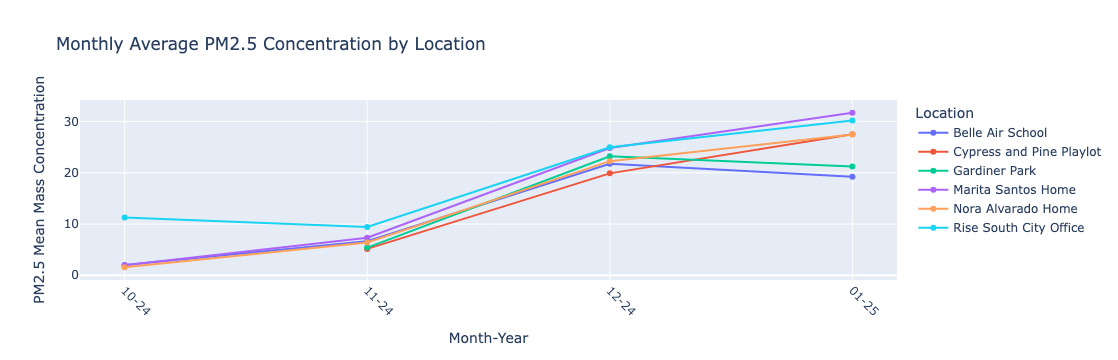

In [76]:
# Create line plot using Plotly
fig = px.line(
    monthly_avg_pm2_5,
    x='Month-Year', y='pm2_5ConcMass1HourMean.raw',
    color='Location', markers=True,
    title='Monthly Average PM2.5 Concentration by Location',
    labels={'Month-Year': 'Month-Year', 'pm2_5ConcMass1HourMean.raw': 'PM2.5 Mean Mass Concentration'}
)

fig.update_xaxes(tickangle=45)
fig.show()

In [77]:
# Aggregate data to daily level
daily_avg_pm2_5 = clarity_highway_df.groupby(['Location', clarity_highway_df['startOfPeriod'].dt.date]).agg({'pm2_5ConcMass1HourMean.raw': 'mean'}).reset_index()
daily_avg_pm2_5.rename(columns={'startOfPeriod': 'Date'}, inplace=True)

# Sort the DataFrame by 'Date'
daily_avg_pm2_5 = daily_avg_pm2_5.sort_values(by='Date')

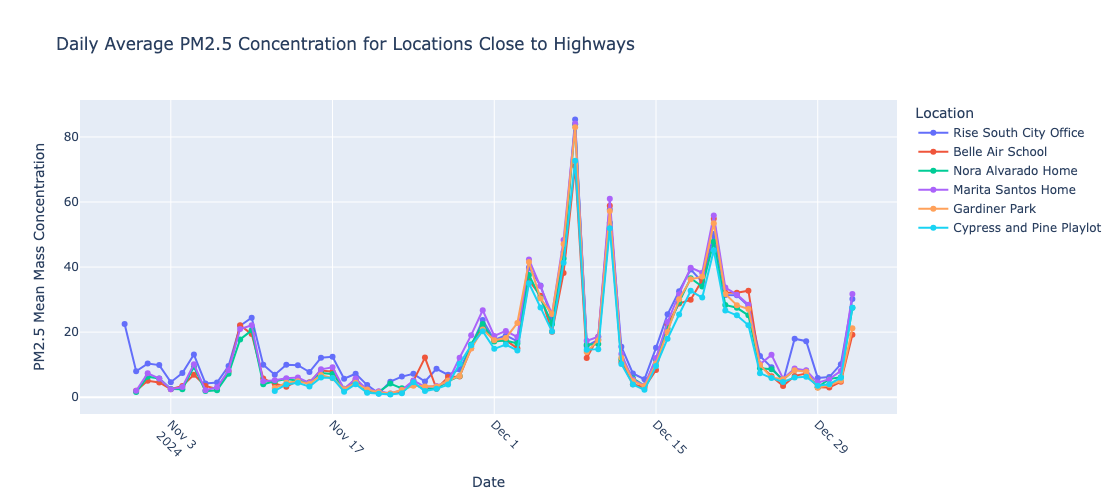

In [78]:
# Create line plot using Plotly
fig = px.line(
    daily_avg_pm2_5,
    x='Date', y='pm2_5ConcMass1HourMean.raw',
    color='Location', markers=True,
    title='Daily Average PM2.5 Concentration for Locations Close to Highways',
    labels={'Date': 'Date', 'pm2_5ConcMass1HourMean.raw': 'PM2.5 Mean Mass Concentration'}
)

# Update output size of plot
fig.update_layout(width=800, height=500)  # Adjust width as needed

# Show plot and adjust axes
fig.update_xaxes(tickangle=45)
fig.show()

In [83]:
# Pivot for modeling and prediction
daily_avg_pm2_5_pivot = daily_avg_pm2_5.pivot(
    index="Date", columns="Location", values="pm2_5ConcMass1HourMean.raw"
)

# Drop all data points with no readings
daily_avg_pm2_5_pivot.dropna(inplace=True)

daily_avg_pm2_5_pivot.shape

(51, 6)

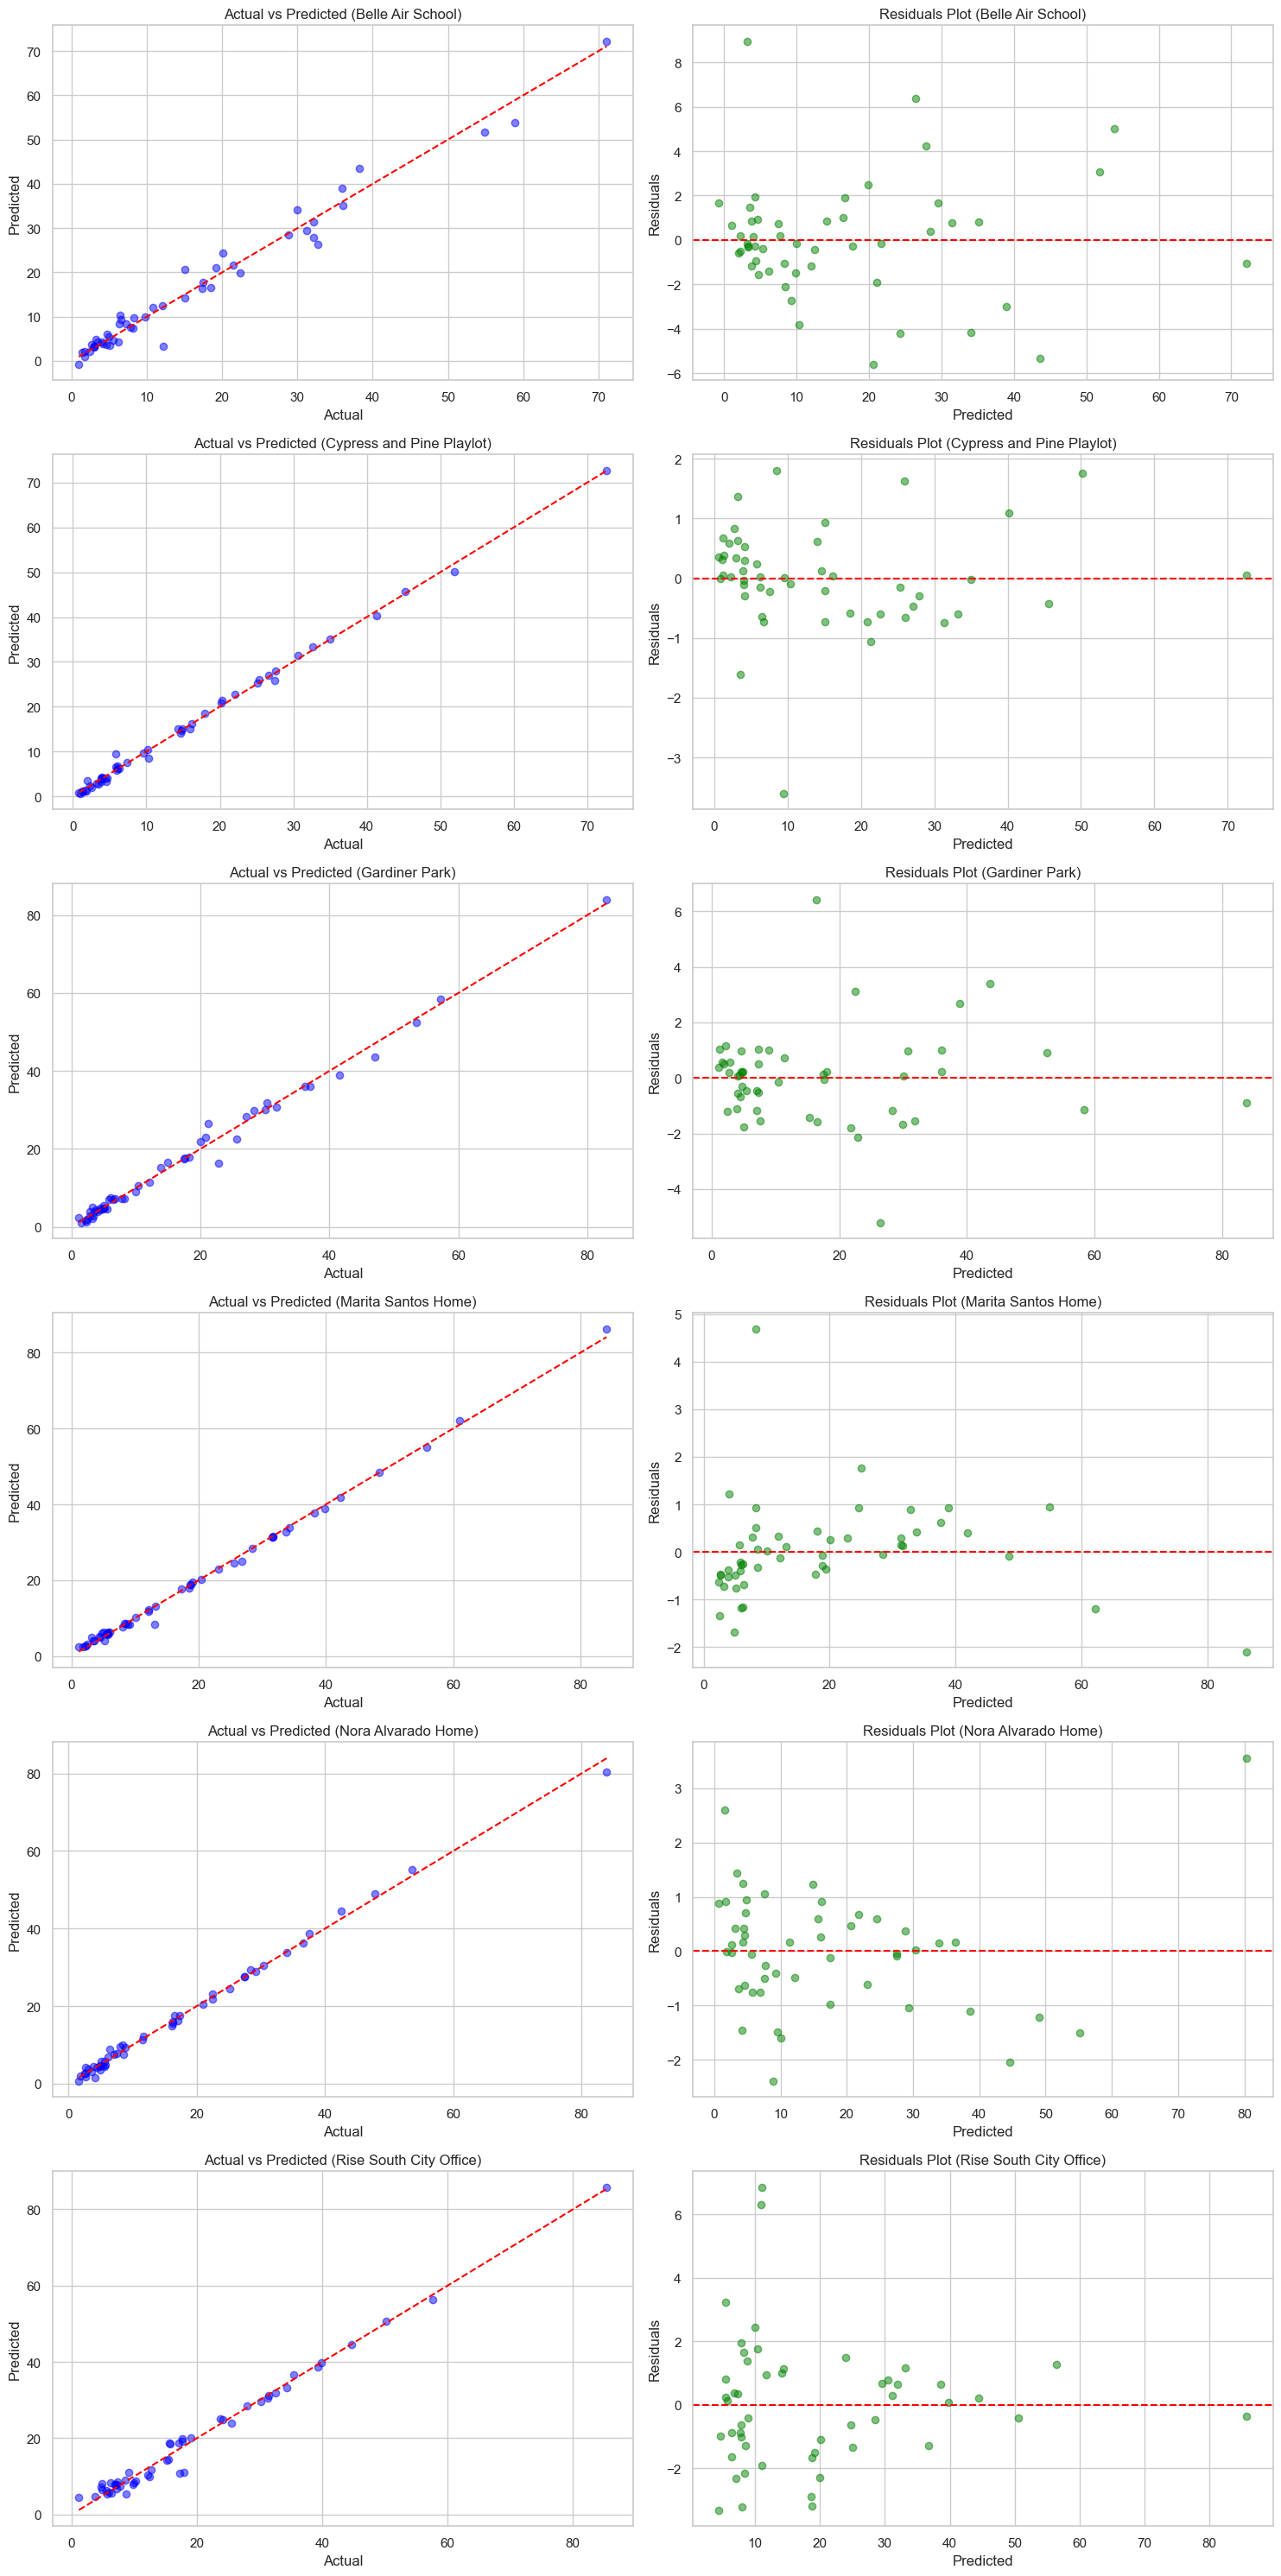

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set up plotting environment
sns.set(style="whitegrid")

# Initialize the figure for subplots
fig, axes = plt.subplots(nrows=len(daily_avg_pm2_5_pivot.columns), ncols=2, figsize=(15, len(daily_avg_pm2_5_pivot.columns)*5))

# Loop through each column (target variable) and perform regression
for idx, col in enumerate(daily_avg_pm2_5_pivot.columns):
    # Set target variable
    y = daily_avg_pm2_5_pivot[col]
    # Set predictors as all other columns
    X = daily_avg_pm2_5_pivot.drop(columns=[col])
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Compute residuals and R-squared
    residuals = y - y_pred
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    # Plot Actual vs Predicted
    axes[idx, 0].scatter(y, y_pred, color="blue", alpha=0.5)
    axes[idx, 0].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Ideal line
    axes[idx, 0].set_title(f"Actual vs Predicted ({col})")
    axes[idx, 0].set_xlabel("Actual")
    axes[idx, 0].set_ylabel("Predicted")
    
    # Plot Residuals
    axes[idx, 1].scatter(y_pred, residuals, color="green", alpha=0.5)
    axes[idx, 1].axhline(y=0, color="red", linestyle="--")  # Zero residual line
    axes[idx, 1].set_title(f"Residuals Plot ({col})")
    axes[idx, 1].set_xlabel("Predicted")
    axes[idx, 1].set_ylabel("Residuals")

# Adjust layout to make the plots more readable
plt.tight_layout()
plt.show()

In [55]:
# Make copy for future comparisons
clarity_comp_df = clarity_unclean_df.copy()

# New column separating highway locations from others
clarity_comp_df['is_highway'] = clarity_comp_df['Location'].isin(highway_locations)

In [56]:
# Aggregate data to monthly level
monthly_avg_pm2_5 = clarity_comp_df.groupby(['Month-Year', 'is_highway']).agg({'pm2_5ConcMass1HourMean.raw': 'mean'}).reset_index()

# Sort by month-year
monthly_avg_pm2_5 = monthly_avg_pm2_5.sort_values(by='Month-Year')

monthly_avg_pm2_5.head()

/var/folders/tc/ygtvb05s0279mq2rg4cgkqp00000gn/T/ipykernel_59293/23969892.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Month-Year,is_highway,pm2_5ConcMass1HourMean.raw
0,10-24,False,1.994000
1,10-24,True,7.794082
2,11-24,False,5.432038
3,11-24,True,6.942297
4,12-24,False,19.922952


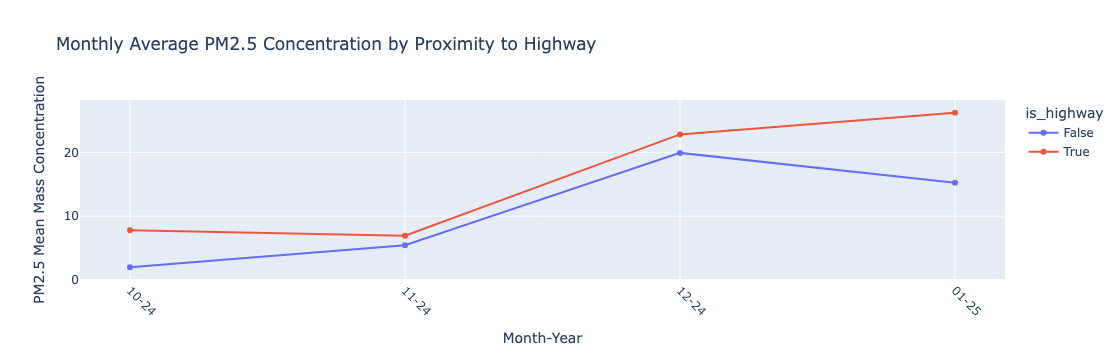

In [57]:
# Create line plot using Plotly
fig = px.line(
    monthly_avg_pm2_5,
    x='Month-Year', y='pm2_5ConcMass1HourMean.raw',
    color='is_highway', markers=True,
    title='Monthly Average PM2.5 Concentration by Proximity to Highway',
    labels={'Month-Year': 'Month-Year', 'pm2_5ConcMass1HourMean.raw': 'PM2.5 Mean Mass Concentration'}
)

fig.update_xaxes(tickangle=45)
fig.show()

In [58]:
# Aggregate data to daily level
daily_avg_pm2_5 = clarity_comp_df.groupby(['is_highway', clarity_comp_df['startOfPeriod'].dt.date]).agg({'pm2_5ConcMass1HourMean.raw': 'mean'}).reset_index()
daily_avg_pm2_5.rename(columns={'startOfPeriod': 'Date'}, inplace=True)

# Sort the DataFrame by 'Date'
daily_avg_pm2_5 = daily_avg_pm2_5.sort_values(by='Date')

In [59]:
# Compute standard deviation for each Date and is_highway group
daily_avg_pm2_5["pm2_5_std"] = clarity_comp_df.groupby(["is_highway", clarity_comp_df['startOfPeriod'].dt.date])["pm2_5ConcMass1HourMean.raw"].transform("std")

# Fill NaN values with 0 (if needed)
daily_avg_pm2_5["pm2_5_std"] = daily_avg_pm2_5["pm2_5_std"].fillna(0)

# Compute count for each Data and is_highway group
daily_avg_pm2_5["count"] = clarity_comp_df.groupby(["is_highway", clarity_comp_df['startOfPeriod'].dt.date])["pm2_5ConcMass1HourMean.raw"].transform("count")

daily_avg_pm2_5.head()

,is_highway,Date,pm2_5ConcMass1HourMean.raw,pm2_5_std,count
63,True,2024-10-30,22.468571,6.092648,42
64,True,2024-10-31,5.348333,0.806322,30
0,False,2024-10-31,1.994000,16.015714,7
1,False,2024-11-01,5.537417,16.015714,7
65,True,2024-11-01,7.253646,0.806322,30


In [60]:
# Compute 95% confidence intervals
z_score = 1.96  # For 95% confidence level
daily_avg_pm2_5["pm2_5_ci"] = z_score * (daily_avg_pm2_5["pm2_5_std"] / np.sqrt(daily_avg_pm2_5["count"]))

# Compute CI upper and lower bounds
daily_avg_pm2_5["pm2_5_upper"] = daily_avg_pm2_5["pm2_5ConcMass1HourMean.raw"] + daily_avg_pm2_5["pm2_5_ci"]
daily_avg_pm2_5["pm2_5_lower"] = daily_avg_pm2_5["pm2_5ConcMass1HourMean.raw"] - daily_avg_pm2_5["pm2_5_ci"]

daily_avg_pm2_5

,is_highway,Date,pm2_5ConcMass1HourMean.raw,pm2_5_std,count,pm2_5_ci,pm2_5_upper,pm2_5_lower
63,True,2024-10-30,22.468571,6.092648,42,1.842627,24.311199,20.625944
64,True,2024-10-31,5.348333,0.806322,30,0.288539,5.636872,5.059795
0,False,2024-10-31,1.994000,16.015714,7,11.864607,13.858607,-9.870607
1,False,2024-11-01,5.537417,16.015714,7,11.864607,17.402023,-6.327190
65,True,2024-11-01,7.253646,0.806322,30,0.288539,7.542185,6.965107
...,...,...,...,...,...,...,...,...
124,True,2024-12-30,4.690000,4.357573,96,0.871696,5.561696,3.818304
125,True,2024-12-31,6.671667,2.226693,120,0.398406,7.070073,6.273261
61,False,2024-12-31,5.289110,6.092648,42,1.842627,7.131737,3.446482
62,False,2025-01-01,15.248676,0.806322,30,0.288539,15.537215,14.960138


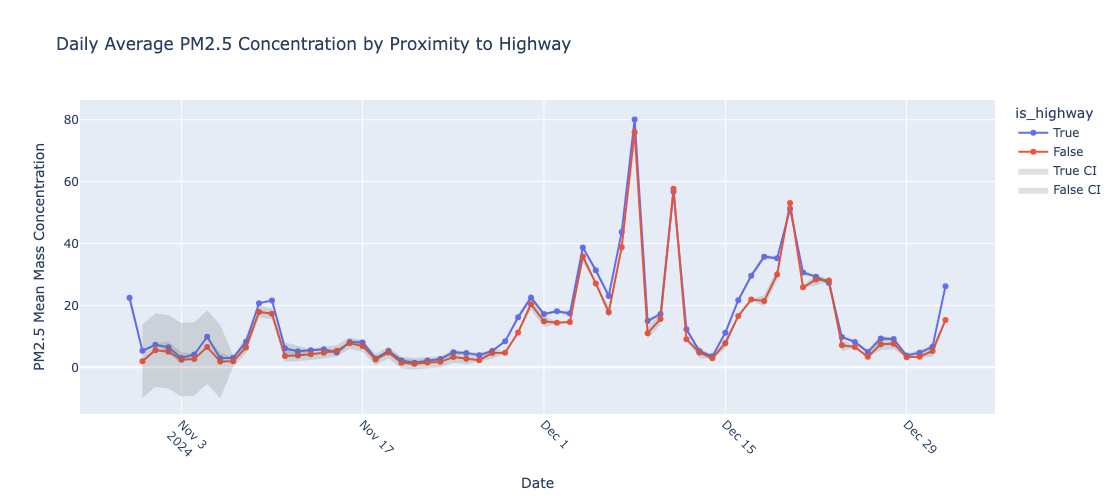

In [61]:
import plotly.graph_objects as go

# Define color mapping for each is_highway category
color_map = {
    "Highway": "rgba(255, 99, 71, 0.2)",  # Tomato Red
    "Non-Highway": "rgba(70, 130, 180, 0.2)"  # Steel Blue
}

# Create the base line plot
fig = px.line(
    daily_avg_pm2_5,
    x='Date', y='pm2_5ConcMass1HourMean.raw',
    color='is_highway', markers=True,
    title='Daily Average PM2.5 Concentration by Proximity to Highway',
    labels={'Date': 'Date', 'pm2_5ConcMass1HourMean.raw': 'PM2.5 Mean Mass Concentration'}
)

# Add shaded area for uncertainty intervals with different colors
for highway_group in daily_avg_pm2_5["is_highway"].unique():
    df_group = daily_avg_pm2_5[daily_avg_pm2_5["is_highway"] == highway_group]
    
    fig.add_traces([
        go.Scatter(
            x=df_group["Date"],
            y=df_group["pm2_5_upper"],
            mode="lines",
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            x=df_group["Date"],
            y=df_group["pm2_5_lower"],
            mode="lines",
            fill="tonexty",
            line=dict(width=0),
            fillcolor=color_map.get(highway_group, "rgba(100,100,100,0.2)"),  # Default gray if missing
            name=f"{highway_group} CI"
        )
    ])

# Adjust size of output plot
fig.update_layout(width=800, height=500)  # Adjust width as needed

fig.update_xaxes(tickangle=45)
fig.show()

In [34]:
# Census tracts for SSF
ssf_tracts = [
    '6001P',
    '6017',
    '6018P',
    '6018',
    '6019',
    '6019.01',
    '6019.02',
    '6020P',
    '6020.01',
    '6020.02',
    '6021',
    '6022',
    '6022.02',
    '6022.01',
    '6023P',
    '6024P',
    '6024',
    '6025',
    '6026',
    '6026.02',
    '6038.01',
    '6038.02',
    '6039',
    '6040',
    '6041.02P',
    '6041.03',
    '6041.04',
    '6042P'
]

# Census tracts for SB
sb_tracts = [
    '6023P',
    '6030P',
    '6035P',
    '6036P',
    '6037',
    '6038P',
    '6039P',
    '6040',
    '6041.01P',
    '6041.02P',
    '6042P',
    '6046P',
    '6135.01P'
]

other_tracts = [
    '6016.01',
    '6027',
    '6140',
    '6016.03',
    '6016.05'
]

tracts = ssf_tracts + sb_tracts + other_tracts

# Tracts in the shapefile don't contain 'P'
reformat = lambda tract: tract.replace('P', '')
tracts_reformatted = list(map(reformat, tracts))

In [2]:
import requests

# URL for PurpleAir API
url = (
    "https://api.purpleair.com/v1/sensors?fields=name%2C%20sensor_index%2C%20longitude"
    "%2C%20latitude%2C%20pm2.5%2C%20pm2.5_60minute%2C%20confidence%2C%20rssi&nwlat=37.664934"
    "&nwlng=-122.438679&selat=37.603488&selng=-122.380142"
      )

# Add API key to URL header
headers = {'X-API-Key': '07F29582-E02A-11EF-A3B4-42010A800010'}

# Get API response
response = requests.get(url, headers=headers)
data = response.json()

# Create a dataframe from the json response
df = pd.DataFrame(data['data'], columns=data['fields'])
df.head()

NameError: name 'pd' is not defined

In [36]:
import geopandas as gpd

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude'], crs='EPSG:4326'))
gdf.head()

,sensor_index,name,rssi,latitude,longitude,confidence,pm2.5,pm2.5_60minute,geometry
0,21427,Grundy Park,-55,37.622585,-122.420970,100,1.1,1.1,POINT (-122.42097 37.62258)
1,35103,Downtown South San Francisco Inside,-58,37.656963,-122.416110,59,0.0,0.0,POINT (-122.41611 37.65696)
2,65711,Commodore Dr,-56,37.633860,-122.423110,100,1.5,2.0,POINT (-122.42311 37.63386)
3,67419,Acacia And Crystal Springs,-65,37.618250,-122.413450,100,1.7,2.2,POINT (-122.41345 37.61825)
4,67553,SB1,-64,37.617794,-122.412735,30,0.4,1.0,POINT (-122.41274 37.61779)


In [37]:
# Read your shapefile
census_tracts = gpd.read_file('../data/tl_2024_06_tract.shp')
census_tracts['NAME'] = census_tracts['NAME'].astype(str)

In [38]:
# Census tracts for SSF and SB
ssf_sb_tracts = census_tracts[(census_tracts['COUNTYFP'] == '081') & census_tracts['NAME'].isin(tracts_reformatted)]

<Axes: >

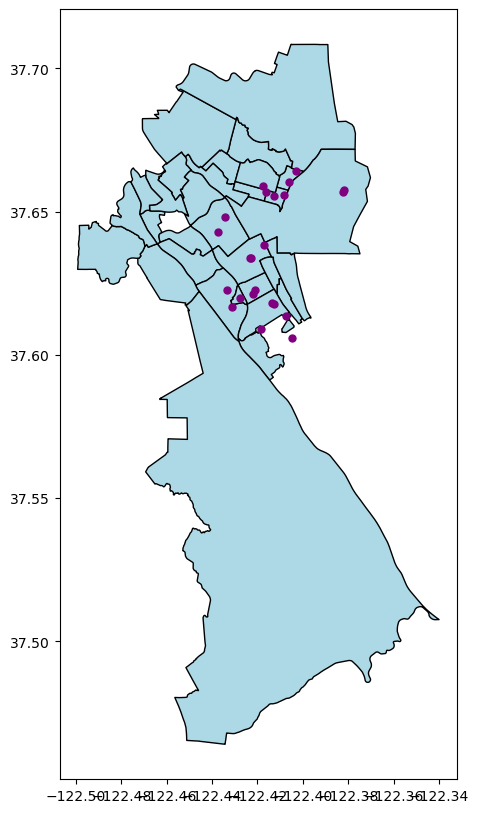

In [44]:
# Plot the shapefile
ax = ssf_sb_tracts.plot(color='lightblue', edgecolor='black', figsize=(10, 10))

# Overlay the points from your GeoDataFrame
gdf.plot(ax=ax, marker='o', color='purple', markersize=25)

In [57]:
# Retrieve history for each purple air monitor
sensor_ids = list(df['sensor_index'])

# Initialize an empty dataframe to hold all sensor data
all_sensor_data = pd.DataFrame()

# Base URL for API requests
base_url = "https://api.purpleair.com/v1/sensors/{}/history?start_timestamp=1727766000&end_timestamp=1738310400&average=60&fields=rssi%2C%20pm2.5_alt"

for sensor_id in sensor_ids:
    url = base_url.format(sensor_id)
    # Get API response
    response = requests.get(url, headers=headers)
    data = response.json()
    
    # Create a dataframe from the json response
    sensor_df = pd.DataFrame(data['data'], columns=data['fields'])

    # Add data to all sensor data frame
    all_sensor_data = pd.concat([all_sensor_data, sensor_df], ignore_index=True)

all_sensor_data.shape

{'api_version': 'V1.0.14-0.0.58', 'time_stamp': 1741600848, 'sensor_index': 21427, 'start_timestamp': 1727766000, 'end_timestamp': 1738310400, 'average': 60, 'private': 0, 'fields': ['time_stamp', 'rssi', 'pm2.5_alt'], 'data': [[1736373600, -55, 0.4], [1736370000, -55, 0.7], [1736319600, -59, 0.6], [1736326800, -60, 0.3], [1736136000, -60, 4.5], [1736193600, -60, 4.9], [1736179200, -59, 5.0], [1736182800, -60, 7.7], [1736190000, -58, 14.6], [1731495600, -59, 0.6], [1731528000, -62, 0.5], [1734775200, -58, 11.6], [1734811200, -58, 0.8], [1734796800, -58, 1.0], [1736042400, -58, 2.9], [1736046000, -58, 3.3], [1729389600, -59, 3.4], [1729436400, -57, 3.1], [1728723600, -59, 1.3], [1728730800, -58, 1.3], [1730228400, -59, 0.8], [1730203200, -56, 0.9], [1731996000, -60, 2.0], [1736474400, -57, 2.6], [1732935600, -57, 5.4], [1732791600, -58, 1.3], [1732762800, -58, 1.6], [1732784400, -58, 1.5], [1733968800, -60, 4.1], [1734044400, -60, 1.4], [1737424800, -55, 2.4], [1737460800, -55, 0.6], [1

(61941, 3)

In [58]:
all_sensor_data.shape

(61941, 3)

In [59]:
all_sensor_data.head()

,time_stamp,rssi,pm2.5_alt
0,1736373600,-55,0.4
1,1736370000,-55,0.7
2,1736319600,-59,0.6
3,1736326800,-60,0.3
4,1736136000,-60,4.5


## **Pull PurpleAir Data**

In [4]:
# URL for PurpleAir API
url = (
    "https://api.purpleair.com/v1/sensors?fields=name%2C%20sensor_index%2C%20longitude"
    "%2C%20latitude%2C%20pm2.5%2C%20pm2.5_60minute%2C%20confidence%2C%20rssi&nwlat=37.664934"
    "&nwlng=-122.438679&selat=37.603488&selng=-122.380142"
      )
# Add API key to URL header
headers = {'X-API-Key': '07F29582-E02A-11EF-A3B4-42010A800010'}

# Get API response
response = requests.get(url, headers=headers)
data = response.json()

# Create a dataframe from the json response
df = pd.DataFrame(data['data'], columns=data['fields'])
df.head()

,sensor_index,name,rssi,latitude,longitude,confidence,pm2.5,pm2.5_60minute
0,21427,Grundy Park,-59,37.622585,-122.420970,100,2.3,1.8
1,35103,Downtown South San Francisco Inside,-62,37.656963,-122.416110,77,0.1,0.4
2,65711,Commodore Dr,-68,37.633860,-122.423110,100,4.7,4.4
3,67419,Acacia And Crystal Springs,-63,37.618250,-122.413450,100,2.6,2.7
4,67553,SB1,-61,37.617794,-122.412735,30,1.2,0.6


In [5]:
# Retrieve history for each purple air monitor
sensor_ids = list(df['sensor_index'])
sensor_name = list(df['name'])

# Initialize an empty dataframe to hold all sensor data
all_sensor_data = pd.DataFrame()

# Base URL for API requests
base_url = ("https://api.purpleair.com/v1/sensors/{}/history?start_timestamp=1728716400&end_timestamp=1744268400"
            "&average=60&fields=pm2.5_atm%2C%20pm1.0_atm%2C%20pm10.0_atm%2C%20humidity%2C%20pressure%2C%20temperature")

for sensor_id in sensor_ids:
    url = base_url.format(sensor_id)
    # Get API response
    response = requests.get(url, headers=headers)
    data = response.json()
    
    # Create a dataframe from the json response
    sensor_df = pd.DataFrame(data['data'], columns=data['fields'])

    # Add sensor ID to the dataframe
    sensor_df['sensor_index'] = sensor_id
    sensor_df['sensor_name'] = sensor_name[sensor_ids.index(sensor_id)]

    # Add data to all sensor data frame
    all_sensor_data = pd.concat([all_sensor_data, sensor_df], ignore_index=True)

all_sensor_data.shape

(81454, 9)

In [6]:
all_sensor_data.head()

,time_stamp,humidity,temperature,pressure,pm1.0_atm,pm2.5_atm,pm10.0_atm,sensor_index,sensor_name
0,1744243200,38.566,77.865,1017.291,0.7465,1.6245,2.3390,21427,Grundy Park
1,1743876000,36.832,81.365,1023.731,1.0160,1.9560,2.6980,21427,Grundy Park
2,1744200000,63.298,56.000,1018.155,0.2330,0.8960,1.5225,21427,Grundy Park
3,1735092000,63.700,60.000,1020.175,0.2420,1.1065,1.9585,21427,Grundy Park
4,1743984000,30.465,72.066,1019.378,0.1250,0.5950,0.8570,21427,Grundy Park


In [7]:
# Join to gather longitude and latitude
all_sensor_data = all_sensor_data.merge(df[['sensor_index', 'longitude', 'latitude']], on='sensor_index')

all_sensor_data.head()

,time_stamp,humidity,temperature,pressure,pm1.0_atm,pm2.5_atm,pm10.0_atm,sensor_index,sensor_name,longitude,latitude
0,1744243200,38.566,77.865,1017.291,0.7465,1.6245,2.3390,21427,Grundy Park,-122.42097,37.622585
1,1743876000,36.832,81.365,1023.731,1.0160,1.9560,2.6980,21427,Grundy Park,-122.42097,37.622585
2,1744200000,63.298,56.000,1018.155,0.2330,0.8960,1.5225,21427,Grundy Park,-122.42097,37.622585
3,1735092000,63.700,60.000,1020.175,0.2420,1.1065,1.9585,21427,Grundy Park,-122.42097,37.622585
4,1743984000,30.465,72.066,1019.378,0.1250,0.5950,0.8570,21427,Grundy Park,-122.42097,37.622585


In [9]:
# Convert UNIX timestamp to datetime
all_sensor_data['time_stamp'] = pd.to_datetime(all_sensor_data['time_stamp'], unit='s')
all_sensor_data['time_stamp'] = all_sensor_data['time_stamp'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')

all_sensor_data.head()

,time_stamp,humidity,temperature,pressure,pm1.0_atm,pm2.5_atm,pm10.0_atm,sensor_index,sensor_name,longitude,latitude
0,2025-04-09 17:00:00-07:00,38.566,77.865,1017.291,0.7465,1.6245,2.3390,21427,Grundy Park,-122.42097,37.622585
1,2025-04-05 11:00:00-07:00,36.832,81.365,1023.731,1.0160,1.9560,2.6980,21427,Grundy Park,-122.42097,37.622585
2,2025-04-09 05:00:00-07:00,63.298,56.000,1018.155,0.2330,0.8960,1.5225,21427,Grundy Park,-122.42097,37.622585
3,2024-12-24 18:00:00-08:00,63.700,60.000,1020.175,0.2420,1.1065,1.9585,21427,Grundy Park,-122.42097,37.622585
4,2025-04-06 17:00:00-07:00,30.465,72.066,1019.378,0.1250,0.5950,0.8570,21427,Grundy Park,-122.42097,37.622585


In [10]:
# Write data to CSV
all_sensor_data.to_csv('../data/uncleaned_purple_air_sensor_data.csv', index=False)